# Import Libraries

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [669]:
df = pd.read_csv("adult.data")

# EDA & Data Preprocessing

In [670]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [672]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


make the income column value binary for classification target

In [673]:
df["income"] = df["income"].apply(lambda x: 1 if x == " >50K" else 0)
df.income.value_counts()

,count
income,
0,24720
1,7841


Data Distribution for numerical data

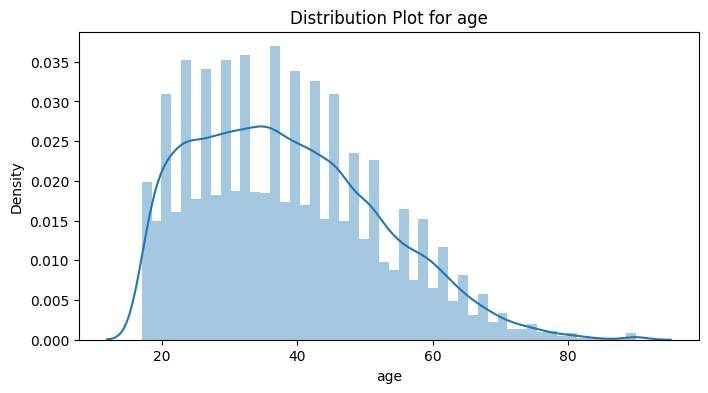

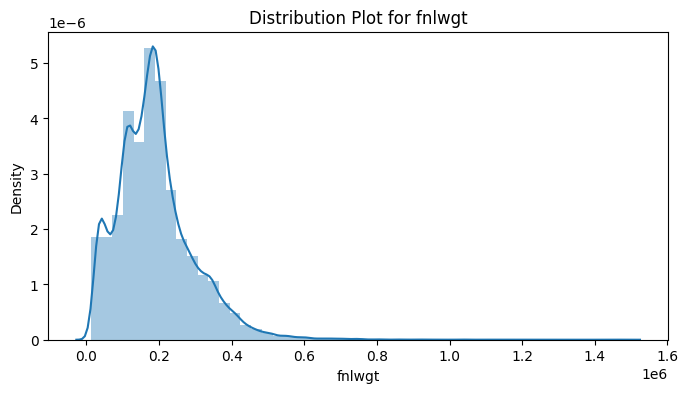

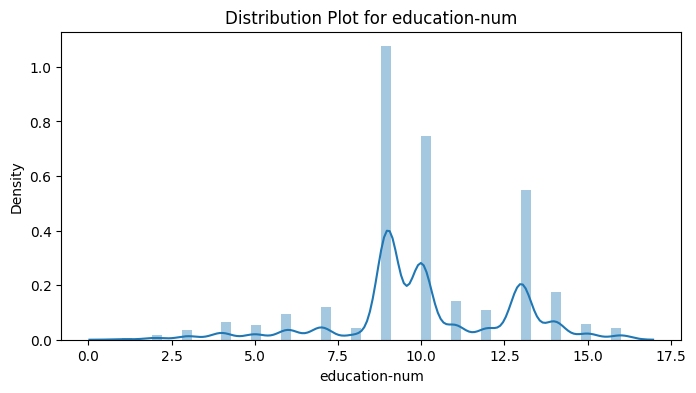

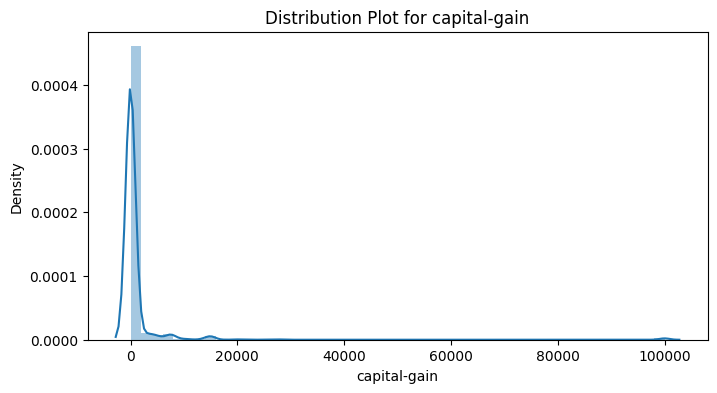

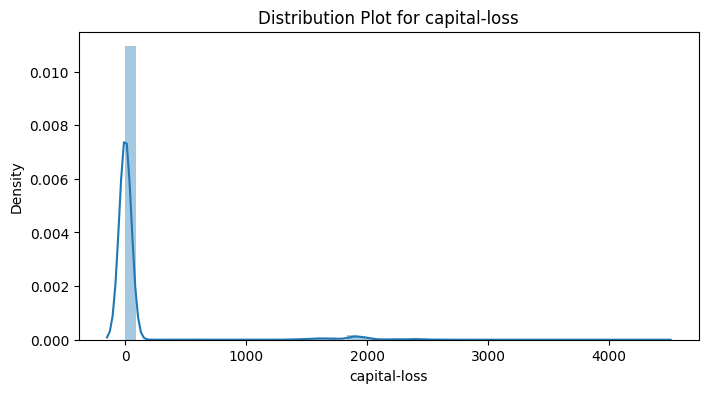

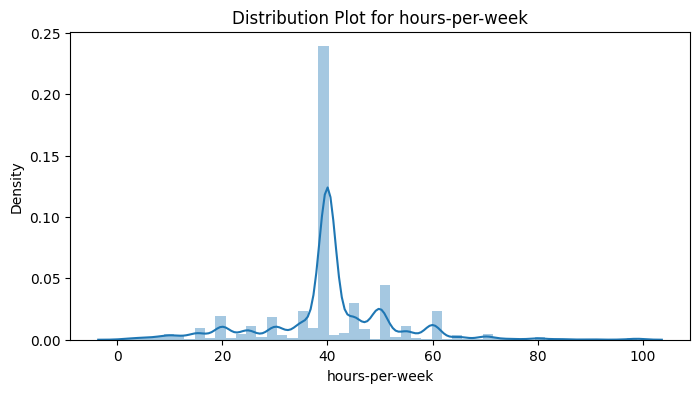

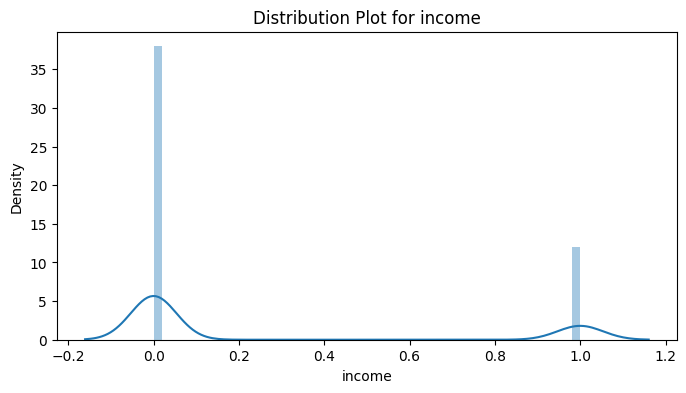

In [674]:
for column in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df[column], kde=True, hist=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Data distribution for categorical data

In [675]:
for column in df.select_dtypes(include='object').columns:
  print(df[column].value_counts())
  print()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial   

There are some data that is skewed, more than half of them only consisted of 1 data. So we may make column value binary, 0 if the data is median and everything else will be 0.

There are some column consisting ? value

In [676]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native-country'].replace(' ?', np.NaN, inplace=True)

In [677]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [678]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

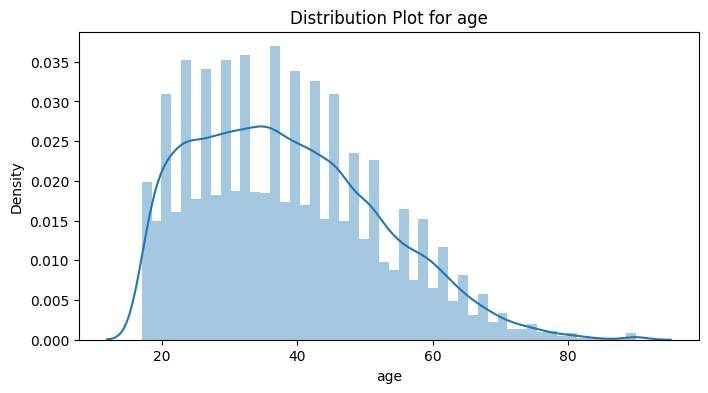

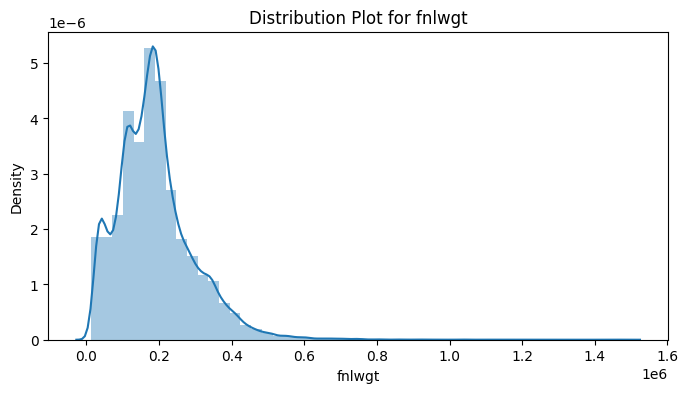

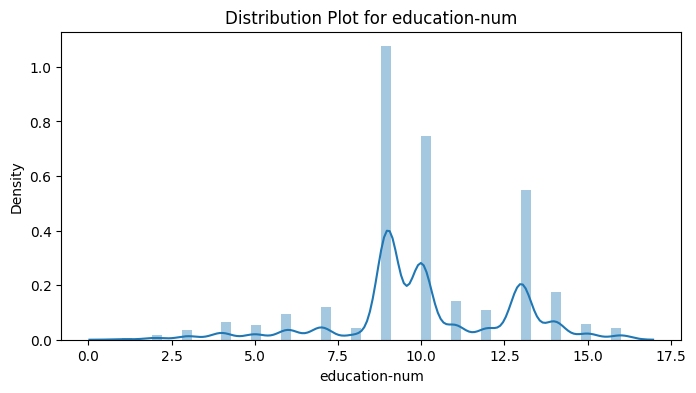

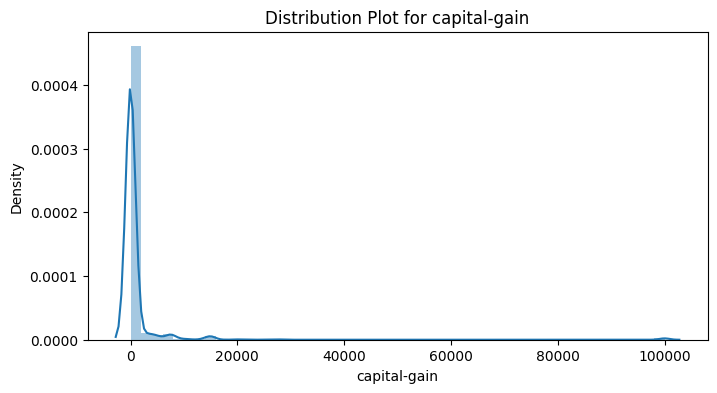

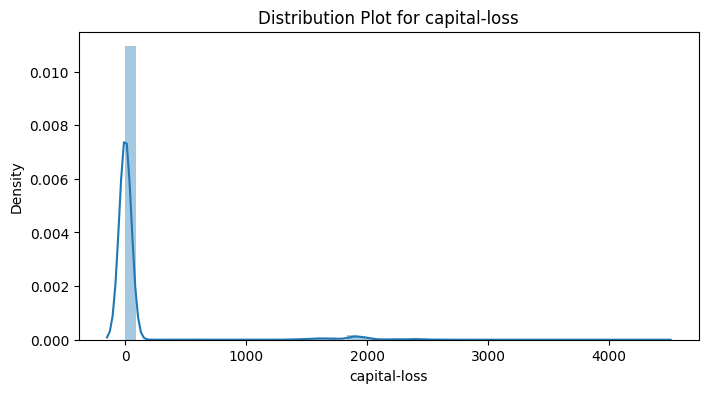

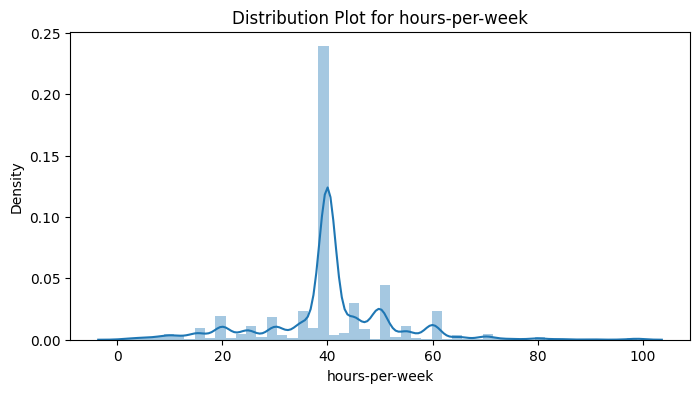

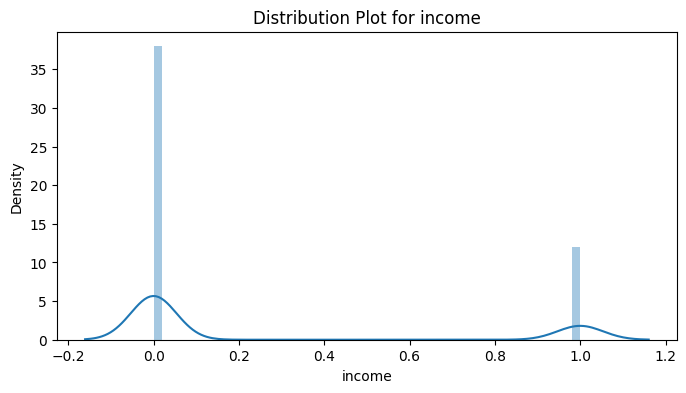

In [679]:
for column in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df[column], kde=True, hist=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

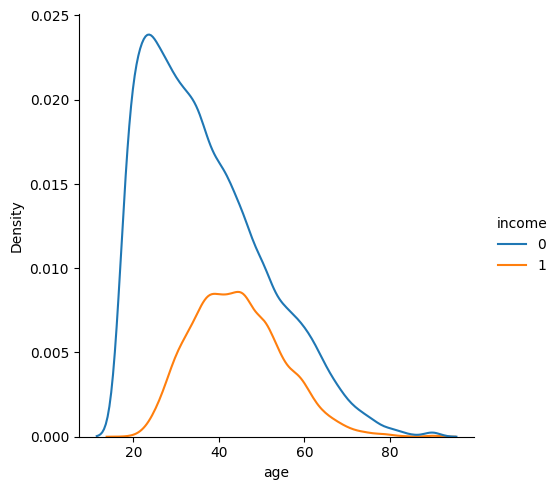

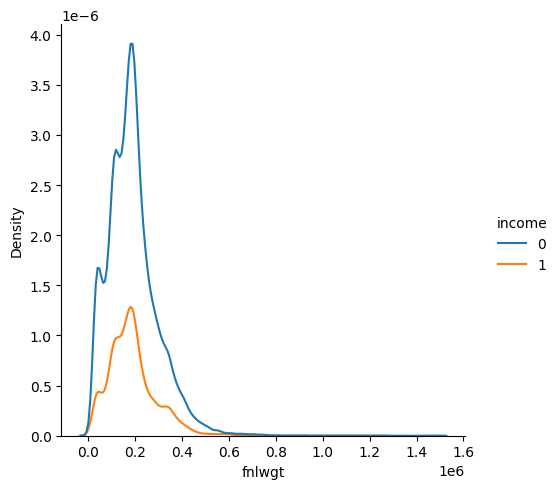

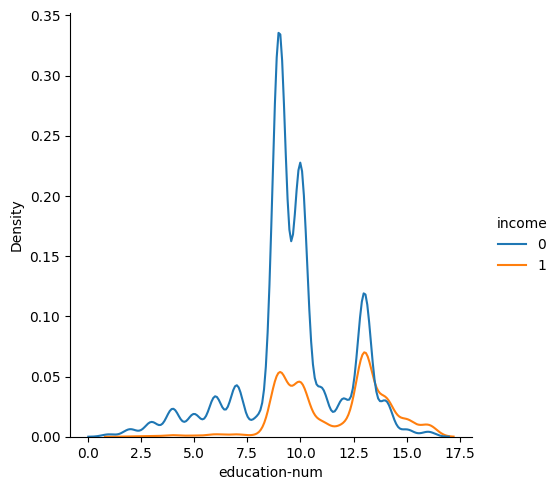

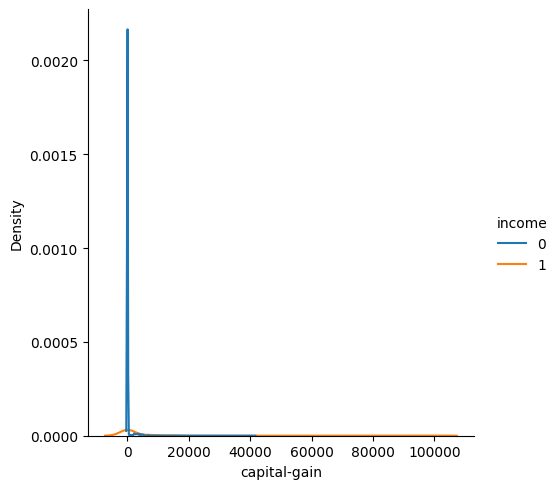

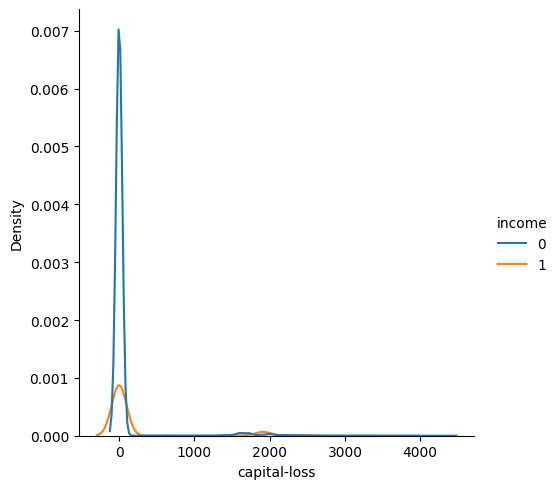

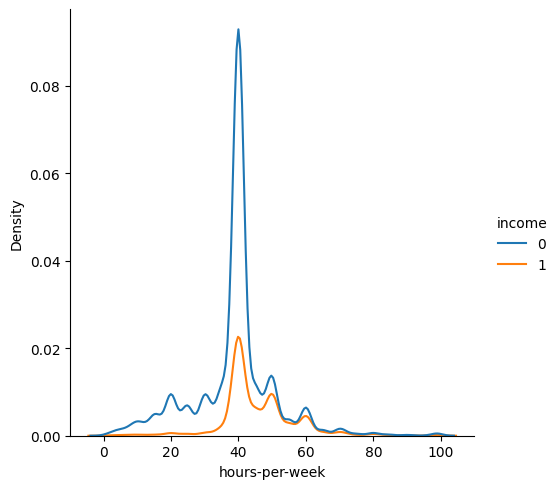

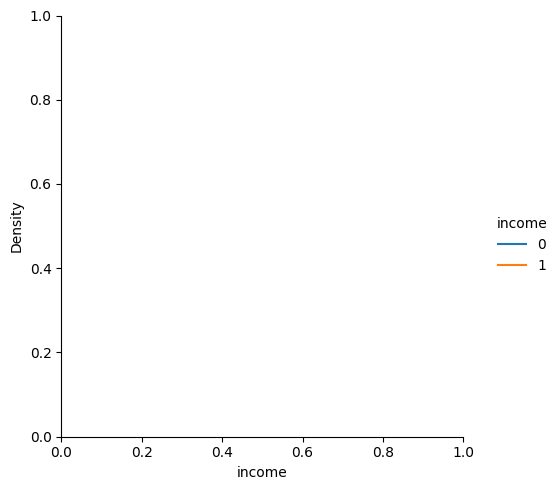

In [680]:
for column in df.select_dtypes(exclude='object').columns:
    sns.displot(data=df, x=column, hue="income", kind="kde")

Outlier detection using box plot

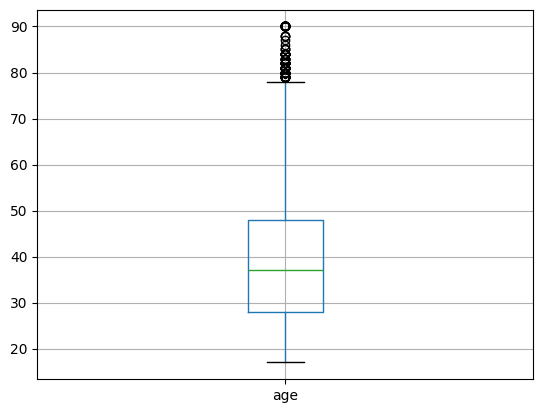

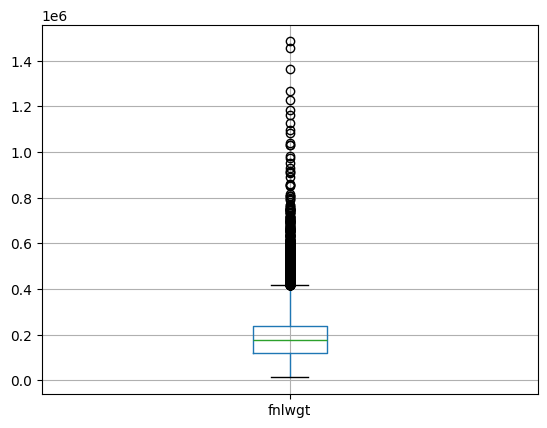

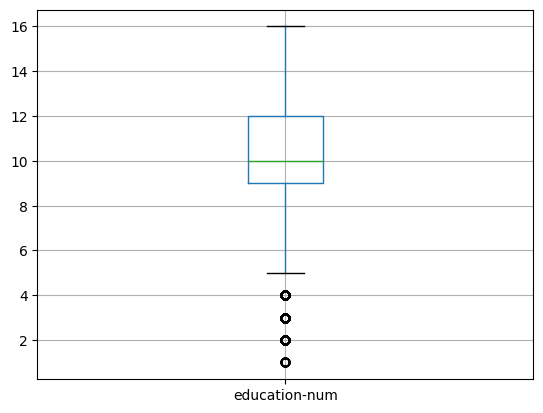

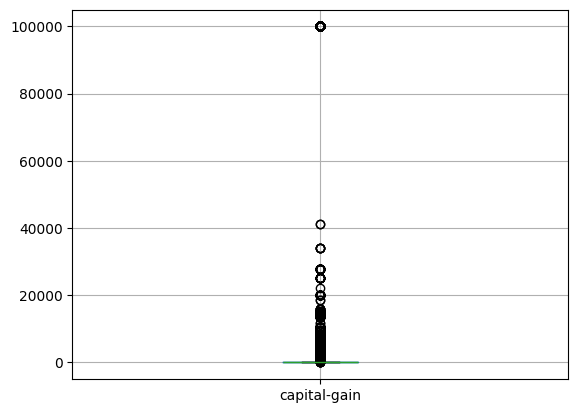

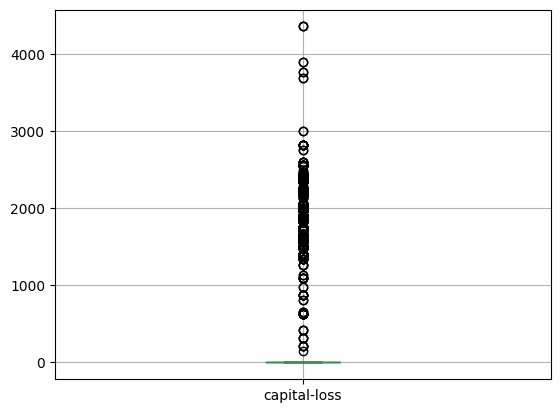

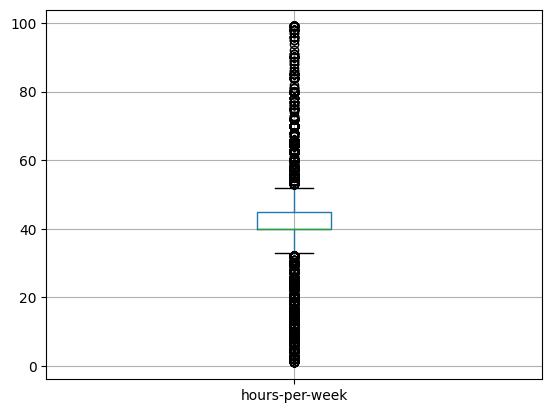

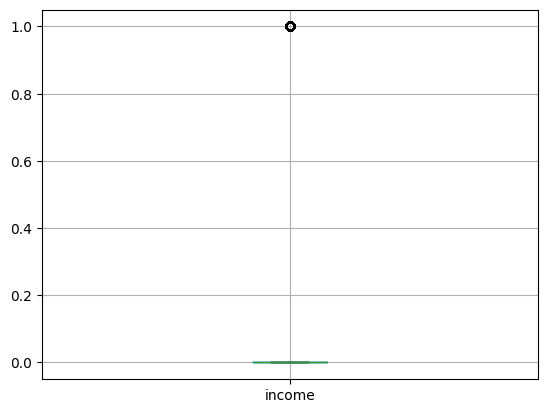

In [681]:
for col in df.select_dtypes(exclude='object'):
    df.boxplot(column=col)
    plt.show()

categorical data exploring

In [682]:
df_categorical = df.select_dtypes(include="object")
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


Split Data

In [683]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

we can't do get dummies or hot encoding for every categorical column because of number of variation.

In [684]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

combined_data = pd.concat([X_train, X_test], axis=0)

for col in X_train.columns:
    le.fit(combined_data[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

Correlation Map

In [685]:
corr = pd.concat([X_train, y_train], axis = 1).corr()
corr.style.background_gradient(cmap='YlGnBu')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.040159,-0.074073,-0.004618,0.038431,-0.267156,0.001983,-0.266924,0.030314,0.089084,0.123730,0.064571,0.068983,0.002207,0.235963
workclass,0.040159,1.000000,-0.027073,0.005832,0.005637,-0.017770,0.002831,-0.060245,0.046990,0.073197,0.014676,0.010535,0.034583,-0.005437,0.002159
fnlwgt,-0.074073,-0.027073,1.000000,-0.029950,-0.041360,0.023534,0.005118,0.005056,-0.013266,0.030525,-0.006656,-0.006189,-0.012472,-0.067917,-0.001813
education,-0.004618,0.005832,-0.029950,1.000000,0.355240,-0.044461,-0.040190,-0.017466,0.013028,-0.022751,0.034584,0.016535,0.057496,0.070915,0.082762
education-num,0.038431,0.005637,-0.041360,0.355240,1.000000,-0.071523,0.070222,-0.095871,0.032791,0.009403,0.156122,0.089729,0.151605,0.084089,0.335576
marital-status,-0.267156,-0.017770,0.023534,-0.044461,-0.071523,1.000000,0.033398,0.185574,-0.068712,-0.122506,-0.075158,-0.037505,-0.188057,-0.021244,-0.198255
occupation,0.001983,0.002831,0.005118,-0.040190,0.070222,0.033398,1.000000,-0.038014,-0.000816,0.047331,0.014012,0.004308,-0.015770,-0.004240,0.035652
relationship,-0.266924,-0.060245,0.005056,-0.017466,-0.095871,0.185574,-0.038014,1.000000,-0.120583,-0.579356,-0.095029,-0.060184,-0.249591,-0.011167,-0.246813
race,0.030314,0.046990,-0.013266,0.013028,0.032791,-0.068712,-0.000816,-0.120583,1.000000,0.085108,0.019870,0.022174,0.038796,0.122246,0.070944
sex,0.089084,0.073197,0.030525,-0.022751,0.009403,-0.122506,0.047331,-0.579356,0.085108,1.000000,0.080971,0.046917,0.228177,0.000084,0.213167


In [686]:
from sklearn.preprocessing import FunctionTransformer

def winsorizeFunc(x, columns):
  x_copy = x.copy()

  for col in columns:
    Q1 = np.percentile(x_copy[col], 25)
    Q3 = np.percentile(x_copy[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x_copy[col] = np.clip(x_copy[col], lower_bound, upper_bound)
  return x_copy

outlierRemover = FunctionTransformer(
    func= lambda x: winsorizeFunc(pd.DataFrame(x, columns=x.columns), X_train.columns)
)

# Modeling

split the data to fit the model better

In [687]:
bernoulli = ["capital-gain", "capital-loss", "fnlwgt"]
gaussian = ["age", "hours-per-week", "education-num"]
categorical = ["workclass","native-country","education","marital-status","occupation","relationship",'race', 'sex']

Pipeline for model with outlier remover

In [692]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeOutlierGauss = Pipeline([
    ('preprocessing', ColumnTransformer(
        [
            ('winsorize', FunctionTransformer(
            func= lambda x: winsorizeFunc(pd.DataFrame(x, columns=x.columns), gaussian)), gaussian),
        ]
    )),
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

pipeOutlierMulti = Pipeline([
    ('preprocessing', ColumnTransformer(
        [
            ('winsorize', FunctionTransformer(
            func= lambda x: winsorizeFunc(pd.DataFrame(x, columns=x.columns), bernoulli)), bernoulli),
        ]
    )),
    ('scaler', MinMaxScaler()),
    ('model', MultinomialNB(alpha=0.1))
])

pipeOutlierCat = Pipeline([
    ('preprocessing', ColumnTransformer(
        [
            ('winsorize', FunctionTransformer(
            func= lambda x: winsorizeFunc(pd.DataFrame(x, columns=x.columns), categorical)), categorical),
        ]
    )),
    ('scaler', MinMaxScaler()),
    ('model', CategoricalNB(alpha= 0.5, min_categories= 10))
])

In [703]:

pipeGauss = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

pipeMulti = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', MultinomialNB())
])

pipeCat = Pipeline([
    ('model', CategoricalNB())
])

Using different Naive Bayes Model based on the data type

In [704]:
pipeGauss.fit(X_train[gaussian], y_train)

pipeMulti.fit(X_train[bernoulli], y_train)

pipeCat.fit(X_train[categorical], y_train)

pipeOutlierGauss.fit(X_train[gaussian], y_train)

pipeOutlierMulti.fit(X_train[bernoulli], y_train)

pipeOutlierCat.fit(X_train[categorical], y_train)

print('Outlier Removal Pipeline')
y_pred = pipeOutlierGauss.predict(X_train[gaussian])
print("gauss train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeOutlierGauss.predict(X_test[gaussian])
print("gauss test : ", accuracy_score(y_test, y_pred))

y_pred = pipeOutlierMulti.predict(X_train[bernoulli])
print("multi train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeOutlierMulti.predict(X_test[bernoulli])
print("multi test : ", accuracy_score(y_test, y_pred))

y_pred = pipeOutlierCat.predict(X_train[categorical])
print("cat train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeOutlierCat.predict(X_test[categorical])
print("cat test : ", accuracy_score(y_test, y_pred))

print()

print('Pipeline')
y_pred = pipeGauss.predict(X_train[gaussian])
print("gauss train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeGauss.predict(X_test[gaussian])
print("gauss test : ", accuracy_score(y_test, y_pred))

y_pred = pipeMulti.predict(X_train[bernoulli])
print("multi train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeMulti.predict(X_test[bernoulli])
print("multi test : ", accuracy_score(y_test, y_pred))

y_pred = pipeCat.predict(X_train[categorical])
print("cat train : " ,accuracy_score(y_train, y_pred))

y_pred = pipeCat.predict(X_test[categorical])
print("cat test : ", accuracy_score(y_test, y_pred))

Outlier Removal Pipeline
gauss train :  0.7957177957177958
gauss test :  0.7998771624526564
multi train :  0.758029133029133
multi test :  0.7618998873989149
cat train :  0.757985257985258
cat test :  0.7620022520217014

Pipeline
gauss train :  0.7982186732186732
gauss test :  0.8022315487767427
multi train :  0.8000614250614251
multi test :  0.8013102671716654
cat train :  0.7882590382590383
cat test :  0.8002866209438019


In [705]:
y_pred = (pipeGauss.predict_proba(X_train[gaussian]) + pipeMulti.predict_proba(X_train[bernoulli]) + pipeCat.predict_proba(X_train[categorical]))

In [706]:
from sklearn.metrics import roc_auc_score

join_model = pipeCat.predict_proba(X_test[categorical])  \
              + pipeGauss.predict_proba(X_test[gaussian])  \
              + pipeMulti.predict_proba(X_test[bernoulli])

join_model2 = join_model.argmax(axis=1)
accuracy_score(y_test, join_model2)


roc_auc_score(y_test, join_model[:,1])

0.899236374722468